In [1]:
from scipy import io
from scipy.stats import mode
from heapq import nsmallest
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
# dct = io.loadmat('C:\Users\lhren\Desktop\Fall 2017/4771\hw\hw1data.mat')
dct = io.loadmat('./hw1data.mat')
X = dct['X'].astype(int) # see piazza @35
Y = dct['Y'].astype(int)
# print (X.shape, Y.shape)

N, K, D = 10000, 10, 784
STEP_SIZE = 1e-9 ### Choose between 1e-6 and 1e-10
MAX_ITER = 500000

In [3]:
# pre-calculated sums for speed up
count = np.zeros(10)
sum_per_label = np.zeros(10)
sum_squared = 0 # regardless of label, need sum of all sqr data

for i in range(N):
    data, label = X[i], Y[i]
    count[label] += 1 # keep count of data mapped to each label
    sum_per_label[label] += sum(data)
    sum_squared += np.dot(data, data)
    
    #for j in range(784):
    #    sum_sq_per_label[label]+=data[j]**2

In [4]:
# norm, eval_f, and plot_run are same for (ii) and (iv)

def norm(v):
    return sum(v * v)

def eval_f(theta):
    """ evaluates f at theta"""
    result = 0
    # triple sum expanded for speed up
    result += sum_squared - 2 * sum(sum_per_label * theta) + D * sum(count * theta ** 2)
    result = result * 0.5
    return result

def plot_run(f_vals, iterations, step_size):
    plt.figure()
    plt.plot(range(iterations), f_vals, 'ro') # +1 due to initial value
    plt.title('step size ' + str(step_size) 
              + ', end in ' + str(iterations) + ' iterations')
    plt.show()

# (ii) function definitions

def grad_of_f(theta):
    """returns gradient of f valued at theta"""
    # triple sum expanded for speed up
    grad = D * theta * count - sum_per_label  
    return grad

def optimize_theta(theta, step_size, max_iter):
    """iterative optimization algorithm from 4(ii)
    
    returns array of function value from iterations
    """
    f_vals = [] #[eval_f(theta)] # starting f value
    i = 0
    
    while i < max_iter:
        grad = grad_of_f(theta)
        if (norm(grad) < 1e-8): # if optimal value reached
            break
        theta -= step_size * grad # else descend theta
        f_vals.append(eval_f(theta))
        i += 1
        
    
    return f_vals, i

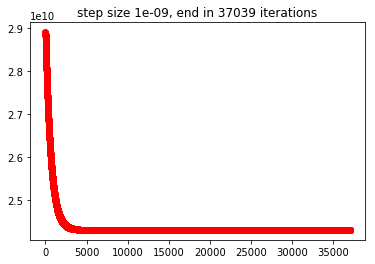

In [5]:
# run (ii)

theta = np.zeros(10)
f_vals, i = optimize_theta(theta, STEP_SIZE, MAX_ITER)
plot_run(f_vals, i, STEP_SIZE)

In [6]:
#grad_of_f(theta) #TEST

In [7]:
# (iv), (v) function definitions

def fast_grad_of_f(theta, sample):
    """returns approximate fast gradient of f using single sample x"""
    x, label = sample[:-1], sample[-1]
    grad = np.zeros(10)
    grad[label] += N * sum(theta[label] - x) # scale grad by N
    return grad

def draw_hist(theta, X_Y):
    """draws histogram as specified in (v)"""
    fast_grads = np.array([fast_grad_of_f(theta, X_Y[i]) for i in range(N)])
    grad = grad_of_f(theta)
    
    # draw histogram for each dim; see @107
    for i in range(10):
        ith_fast_grads, ith_grad = fast_grads[:,i], grad[i]
        # print(ith_fast_grads)
        plt.hist(ith_fast_grads, facecolor='green')
        plt.axvline(ith_grad, color='r', linewidth=1)
        plt.title('gradient of individual data points vs gradient of all data, '
             + 'dimension: ' 
             + str(i + 1))
        plt.show()
    
def fast_optimize_theta(theta, step_size, max_iter):
    """iterative optimization algorithm from 4(iv)
    
    returns array of function value from iterations
    """
    f_vals = [] #[eval_f(theta)] # starting f value
    X_Y = np.concatenate((X, Y), axis=1) # concat for permuting data
    ### ERROR: if converges, may not plot!
    i, histogram_step = 0, random.randrange(max_iter) # arbitrary step to draw histogram 
    
    while i < max_iter:
        np.random.permutation(X_Y) # permute again if dataset exhausted
            
        for j in range(N):
            # do (v) at arbitrary step
            if i == histogram_step:
                draw_hist(theta, X_Y)
                
            grad = fast_grad_of_f(theta, sample=X_Y[j])
            if (norm(grad) < 1e-8): # if optimal value reached
                return f_vals
            theta -= step_size * grad # else descend theta
            f_vals.append(eval_f(theta))
            i += 1
    
    return f_vals, i

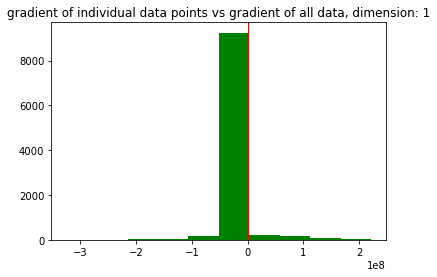

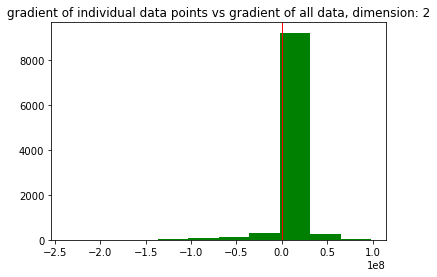

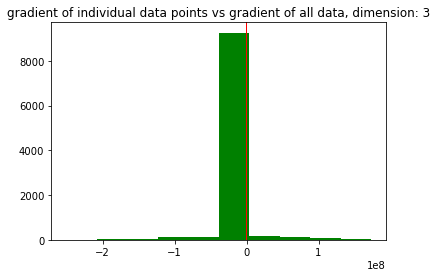

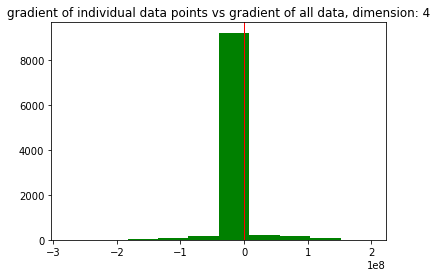

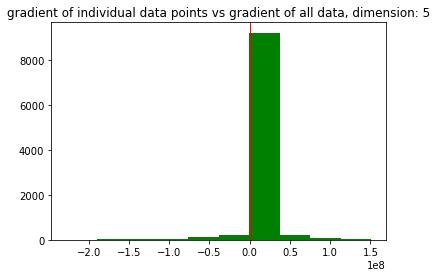

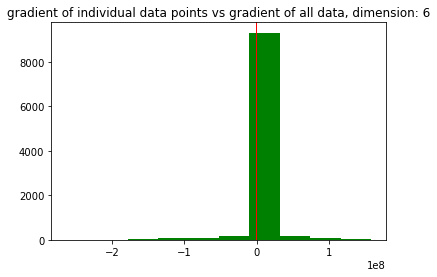

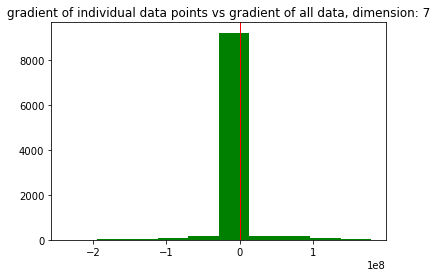

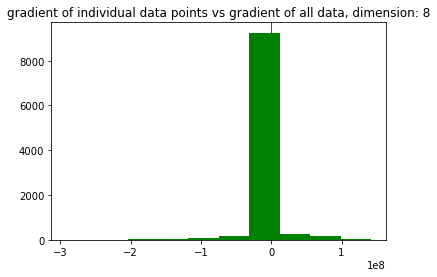

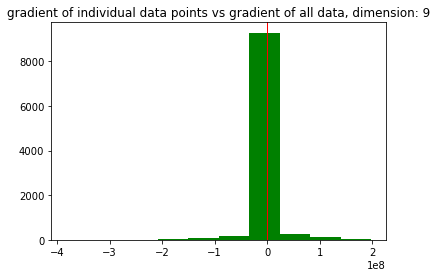

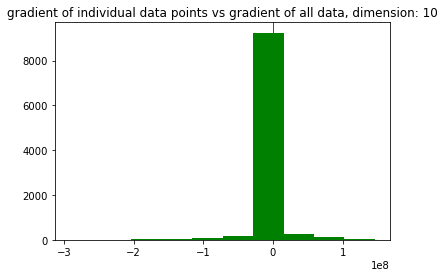

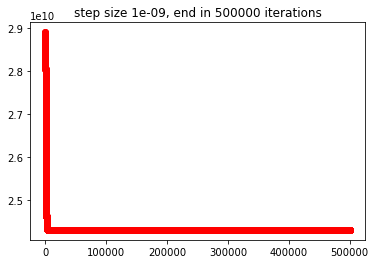

In [8]:
# run (v), (vi)

theta = np.zeros(10)
f_vals, i = fast_optimize_theta(theta, STEP_SIZE, MAX_ITER)
plot_run(f_vals, i, STEP_SIZE)